In [2]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames, CSV
using SparseArrays, LinearAlgebra
using LaTeXStrings

In [ ]:
winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Wi100y_230923_17:23_8P6Z13B5D_ep.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Su100y_230923_19:36_8P6Z13B5D_ep.nc")

In [7]:
function get_endpoints(ds, vars)

    out = Vector{Any}()

    for v in vars
        append!(out, [ds["$v"][:,:,end]])
    end

    return out[1], out[2], out[3], out[4], out[5]

end

function get_nonzero_axes(M)

    Cs = sparse(M)
    (II, JJ, _) = findnz(Cs) 
    
    return II, JJ

end 

function get_temp_mod(season)
    #fit to SPOT data (approx 20 to 4, approx 16 to 4)
    if season == "Win"
        temp_mod = CSV.read("/home/lee/Dropbox/Development/NPZBD_1D/data/temp_mod/win_temp_mod.csv", DataFrame)
    else
        temp_mod = CSV.read("/home/lee/Dropbox/Development/NPZBD_1D/data/temp_mod/sum_temp_mod.csv", DataFrame)
    end

    return Matrix(temp_mod)
end

get_temp_mod (generic function with 1 method)

In [5]:

function calc_growthB(B, D, ds, season)

    II, JJ = get_nonzero_axes(ds["CM"][:])
    vmax = ds["vmax_ij"][:]
    Km = ds["Km_ij"][:]
    y = ds["y_ij"][:]
    temp_fun = ds["temp_fun"][:]

    R = collect(0:0.22:21)[1:89]
    growth = ones(length(B[:,1]), length(B[1,:]))

    for j = axes(II, 1)
        growth[:,j] = y[II[j],JJ[j]] .* (vmax[II[j],JJ[j]] .*  R) ./ (R .+ Km[II[j],JJ[j]])
    end

    return growth, R

end

function calc_growthP(P, N, np, ds, season)

    II, JJ = get_nonzero_axes(ds["CM"][:])
    umax = ds["umax_ij"][:]
    Kp = ds["Kp_ij"][:]
    temp_fun = ds["temp_fun"][:]

    R = collect(0:0.22:21)[1:89]
    growth = ones(length(P[:,1]), length(P[1,:]))

    for j = 1:np
        growth[:,j] = temp_fun .* (umax[j] .*  R) ./ (R .+ Kp[j])
    end

    return growth, R

end

calc_growthP (generic function with 1 method)

In [8]:
# Get endpoints 
Nw, Pw, Zw, Bw, Dw = get_endpoints(winter, ["n", "p", "z", "b", "d"])
Ns, Ps, Zs, Bs, Ds = get_endpoints(summer, ["n", "p", "z", "b", "d"])

([19.79244022686309; 19.798661651284085; … ; 22.252757039984665; 22.252758678849034;;], [2.6840822844793736e-305 3.309597349628924e-305 … 0.21790013371482128 0.39197448002910706; 2.683625243712707e-305 3.307313354823647e-305 … 0.21654896939778207 0.38951981735808494; … ; 2.2252992774675799e-305 2.224452257738221e-305 … 1.7839785653185273e-22 4.1369862576891376e-22; 2.2234061881975855e-305 2.2253933628454255e-305 … 1.7616905206472664e-22 4.085301032144231e-22], [9.141127409548593e-162 0.10623877445782269 … 0.058935722022541215 0.031209206227600463; 9.14112734426802e-162 0.10606037513038065 … 0.058883971724124295 0.03118361723440634; … ; 9.138954199012935e-162 3.2339153941178046e-9 … 6.1971309143985645e-9 3.1817676732867e-9; 9.138954179368071e-162 3.2298291714280087e-9 … 6.189309428377715e-9 3.1777494602039246e-9], [0.08807151708717391 2.6916006645725437e-83 … 1.1344938406935222e-140 5.582518506311399e-143; 0.08791143991043755 2.6990840503772945e-83 … 1.13724069966736e-140 5.599519635643

In [306]:
gBw, R = calc_growthB(Bw, Dw, winter, "Win")

([0.0 0.0 … 0.0 0.0; 0.23643304590949946 0.028928009391036586 … 0.05570367412288953 0.05988614387513359; … ; 0.3004474579062579 0.12864148155882396 … 0.05757630485740047 0.06392271267726068; 0.30045820701685494 0.12870009983596933 … 0.05757656061756373 0.06392328200710659], [0.0, 0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76, 1.98  …  17.38, 17.6, 17.82, 18.04, 18.26, 18.48, 18.7, 18.92, 19.14, 19.36])

In [9]:
gBs, R = calc_growthB(Bs, Ds, summer, "Sum")

([0.0 0.0 … 0.0 0.0; 0.275 0.017785997357992075 … 0.176 0.14352887624466568; … ; 0.3979209979209979 0.01799751094722286 … 0.9986086956521739 1.3761356952500394; 0.3979445015416238 0.017997539228046724 … 0.9992258064516129 1.377699053529868], [0.0, 0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76, 1.98  …  17.38, 17.6, 17.82, 18.04, 18.26, 18.48, 18.7, 18.92, 19.14, 19.36])

In [11]:
gPw, R = calc_growthP(Pw, Nw, 8, winter, "Win")
gPs, R = calc_growthP(Ps, Ns, 8, summer, "Sum")

([0.0 0.0 … 0.0 0.0; 0.0197013518439185 0.03671726153841538 … 0.1532383117043077 0.13343930338152576; … ; 0.008959876556536434 0.016798590167604686 … 0.09369959559908769 0.10112422608189876; 0.008944618415445776 0.0167699965257686 … 0.0935443140055026 0.10096095900046138], [0.0, 0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76, 1.98  …  17.38, 17.6, 17.82, 18.04, 18.26, 18.48, 18.7, 18.92, 19.14, 19.36])

In [296]:
bc= ["cyan3", "darkorange", "indigo", "coral4", "lightcyan4", "magenta2", "orange4", "seagreen4",
"darkkhaki", "purple", "crimson",  "azure4", "turquoise1"]
dc= ["blue3", "black", "maroon", "navy", "brown4"]
pc = ["olivedrab3", "darkgreen","red4", "cyan4", "purple", "black", "hotpink2", "wheat2" ]
nc = ["blue2"]
ab=0.8
ab_ext=0.8
ls=5
lfs=9
lg=:bottomright


function plot_growth_curves(growth, biomass, Rx, R, lbl, _run, f_str, loc, lims, cols, type="B")

    a_in=0.6
    depth = 400
    dz = Int(depth/10)
    zc = get_zc(depth)
    # l = @layout [a{0.9h} b{0.3w} c{0.3w}]
    l = @layout [a{0.5h} b{0.3w} ; 
                c{0.5h} d{0.3w}]
    ls=5

    if type == "P"

        
    
    else
        p1 = plot(Rx, growth[1], lw=ls, lc=cols[1], xrotation=45, 
            xlabel="", ylabel="Growth Rate", border=:box, title="Growth Rate on$(lbl[3])", label="")
            plot!(Rx, growth[2], lw=ls, lc=cols[2], label="")
            plot!(Rx, [growth[1], growth[2]],
                frame=:box,
                alpha=a_in,
                grid=false,
                tickfontsize=5,
                lw=ls, ylabel="", xrotation=45, 
                lc=[cols[1] cols[2]],
                xlabel="", title="", label="", xlim=lims[1], ylim=lims[2],
                inset=bbox(loc[1],loc[2],loc[3],loc[4], :bottom, :right),
                subplot=2
            )

        p2 = plot(biomass[1][1:dz], -zc, lw=ls, lc=cols[1], label=lbl[1], xrotation=45, xlabel="", ylabel="Depth (m)", title="OM Conc.",frame=:box)
            plot!(biomass[2][1:dz], -zc, lw=ls, lc=cols[2], label=lbl[2])
            plot!(R[1][1:dz], -zc, lw=ls, lc=cols[3], ls=:dot, label=lbl[3])

        p3 = plot(Rx, growth[3], lw=ls, lc=cols[1], ylabel="Growth Rate", xrotation=45, 
            xlabel=L" mmol/m^3", border=:box, title="", label="")
            plot!(Rx, growth[4], lw=ls, lc=cols[2], label="")
            plot!(Rx, [growth[3], growth[4]],
                frame=:box,
                grid=false,
                tickfontsize=5,
                alpha=a_in,
                lw=ls, ylabel="", xrotation=45, 
                lc=[cols[1] cols[2]],
                xlabel="", title="", label="", xlim=lims[3], ylim=lims[4],
                inset=bbox(loc[5],loc[6],loc[7],loc[8], :bottom, :right),
                subplot=2
            )

        p4 = plot(biomass[3][1:dz], -zc, lw=ls, lc=cols[1], label=lbl[1], xrotation=45, xlabel=L"mmol/m^3", ylabel="Depth (m)", title="",frame=:box)
            plot!(biomass[4][1:dz], -zc, lw=ls, lc=cols[2], label=lbl[2])
            plot!(R[2][1:dz], -zc, lw=ls, lc=cols[3], ls=:dot, label=lbl[3])
    

        f = plot(p1, p2, p3, p4, 
        fg_legend = :transparent,
        size=(600,700),
        layout = l,
        )

    end

    savefig(f, "/home/lee/Dropbox/Development/NPZBD_1D/results/plots/growth/$(_run)/$(f_str).png")

    return f

end

function get_zc(depth)

    zc = [10/2:10:(depth-10/2)]

    return zc

end

get_zc (generic function with 1 method)

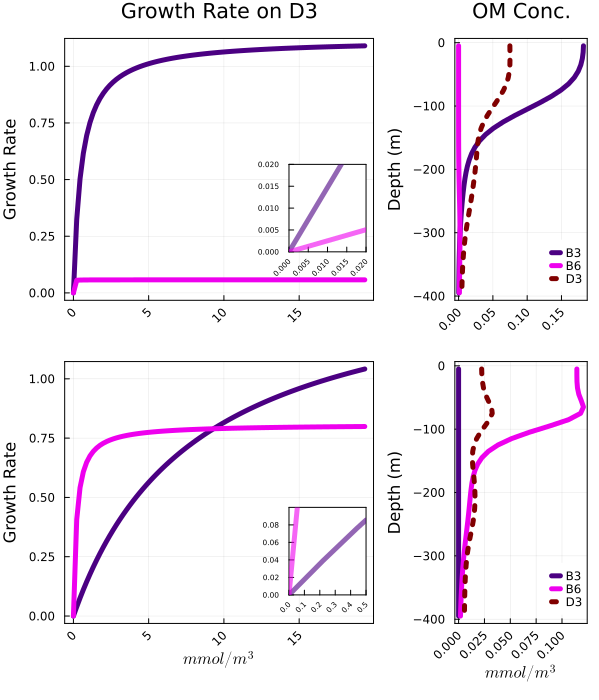

In [314]:
plot_growth_curves([gBw[:, 3],gBw[:, 6], gBs[:, 3], gBs[:, 6]], [Bw[:,3], Bw[:,6], Bs[:,3], Bs[:,6]], 
R, [Dw[:,3], Ds[:,3]], [" B3", " B6", " D3"], "_4P3Z7B4D", "WiSu100y_230827_13:45_D3_B3B6",
[0.05,0.28,0.2,0.25, 0.05,0.3,0.2,0.25], [(0, 0.02),(0, 0.02), (0, 0.5),(0, 0.1)], [bc[3], bc[6], dc[3]])

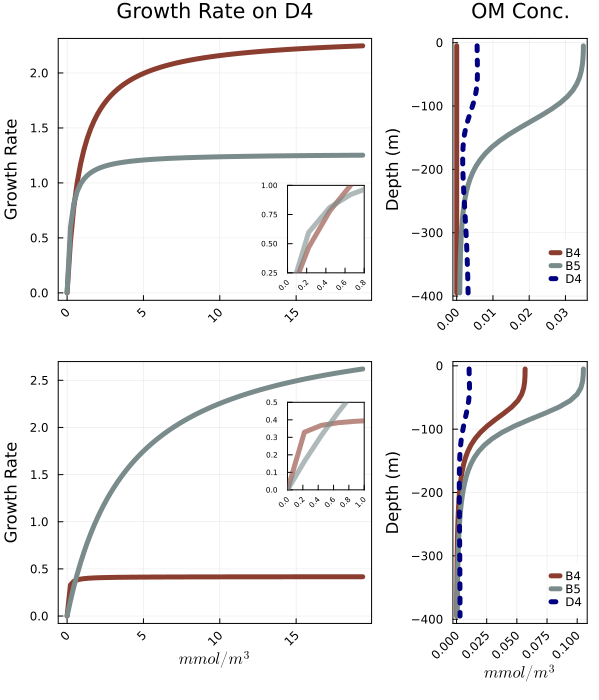

In [322]:
plot_growth_curves([gBw[:, 4],gBw[:, 5], gBs[:, 4], gBs[:, 5]], [Bw[:,4], Bw[:,5], Bs[:,4], Bs[:,5]], 
R, [Dw[:,4], Ds[:,4]], [" B4", " B5", " D4"], "_4P3Z7B4D", "WiSu100y_230827_13:45_D4_B4B5",
[0.05,0.22,0.2,0.25, 0.05,0.6,0.2,0.25], [(0, 0.8),(0.25, 1.0), (0, 1.0),(0, 0.5)], [bc[4], bc[5], dc[4]])

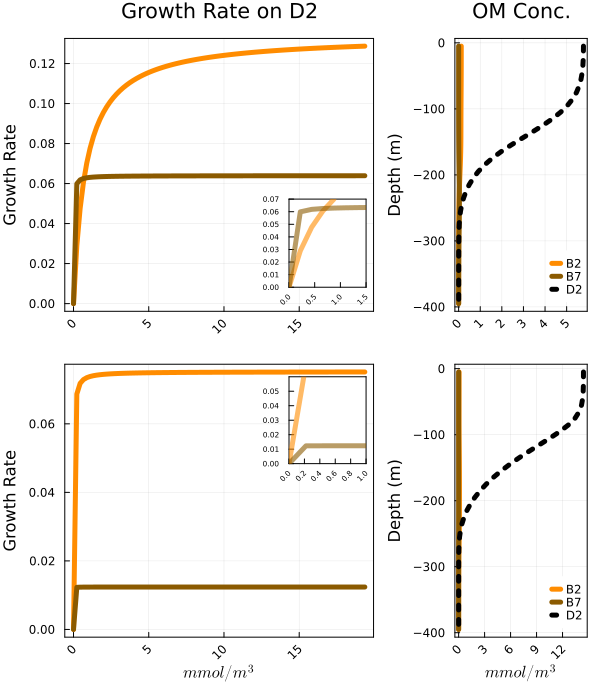

In [317]:
plot_growth_curves([gBw[:, 2],gBw[:, 7], gBs[:, 2], gBs[:, 7]], [Bw[:,2], Bw[:,7], Bs[:,2], Bs[:,7]], 
R, [Dw[:,2], Ds[:,2]], [" B2", " B7", " D2"], "_4P3Z7B4D", "WiSu100y_230827_13:45_D2_B2B7", 
[0.05,0.185,0.2,0.25, 0.05,0.68,0.2,0.25], [(0, 1.5),(0, 0.07), (0, 1),(0, 0.06)], [bc[2], bc[7], dc[2]])

In [ ]:
winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Wi100y_230915_22:19_8P6Z13B6D_ep.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Su100y_230916_11:25_8P6Z13B6D_ep.nc")

In [320]:
# Get endpoints 
Nw, Pw, Zw, Bw, Dw = get_endpoints(winter, ["n", "p", "z", "b", "d"])
Ns, Ps, Zs, Bs, Ds = get_endpoints(summer, ["n", "p", "z", "b", "d"])

([14.774856659603174; 14.782317683450989; … ; 23.759585063192773; 23.759676098079563;;], [2.4003699321990203e-192 2.0238393882323198e-305 … 2.8866168037832027e-305 8.424523391084446e-85; 2.3876688081509966e-192 2.0233512393292987e-305 … 2.884366626751064e-305 8.38370554594679e-85; … ; 2.728753246909641e-212 2.2239655403908385e-305 … 2.2248056141882962e-305 1.7249483734670592e-105; 2.6987036509818546e-212 2.2239870123340388e-305 … 2.2243173897290266e-305 1.704499646259444e-105], [0.07172914421744868 0.030389168842887584 … 0.03521878405994065 0.03650873623809559; 0.07161429963864069 0.030345222431053843 … 0.03519232736356307 0.03648108382029445; … ; 2.5724075253211775e-9 1.3432592700222005e-9 … 6.5115356817586755e-9 5.735993290183234e-9; 2.569157152932678e-9 1.3415619913975668e-9 … 6.50384197273761e-9 5.728845559099259e-9], [0.06319371520427848 1.5873379527910718e-54 … 0.04101669415012777 6.644021860222918e-92; 0.0633398019807321 1.5944703949674617e-54 … 0.04094777628258887 6.65445450300

In [36]:
growthB = calc_growthB(Bw, Dw, winter, "Win")

13-element Vector{Any}:
 [0.0063231917859304905, 0.006793507914102515, 0.0073299585694101875, 0.007926891011827907, 0.008572009964570805, 0.009245307275985055, 0.009919078420457788, 0.01056058510450388, 0.011137585917344036, 0.01162502099146166  …  0.11952428797129473, 0.1348140107524842, 0.15032173779926047, 0.1658165271088313, 0.18109366668180596, 0.19598053723989708, 0.21033889118579638, 0.22406428677536258, 0.23708352583656478, 0.2493508925893634]
 [0.05174471454234373, 0.051735968010634986, 0.051706326395937446, 0.051635121203624026, 0.05148890925440169, 0.05121524376307553, 0.05073334154098529, 0.04992111546435854, 0.0485971979699666, 0.046500504011637286  …  0.03540284083926127, 0.035737396185697524, 0.036017359694998446, 0.03624696313736529, 0.036430613654950046, 0.03657280309635818, 0.03667802646432788, 0.03675070896741669, 0.03679514160912888, 0.036815425541626416]
 [0.04380623897164118, 0.043905369233316865, 0.04405327436629603, 0.04415005670799572, 0.04403703426311514, 0.04

In [9]:
CMd = display(winter["CM"][:])

5×13 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0

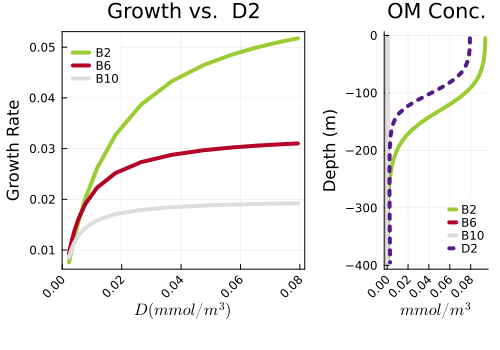

In [37]:
plot_growth_over_D([growthB[2], growthB[6], growthB[10]], [Bw[:,2], Bw[:,6], Bw[:,10]], Dw[:,2], [" B2", " B6", " B10"], " D2")

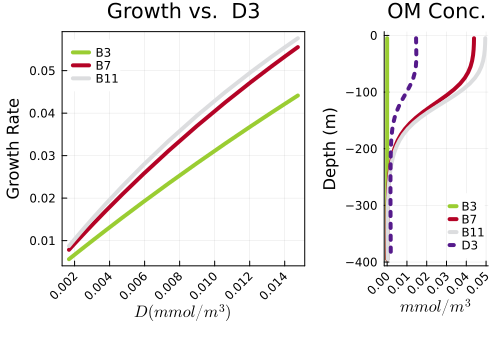

In [38]:
plot_growth_over_D([growthB[3], growthB[7], growthB[11]], [Bw[:,3], Bw[:,7], Bw[:,11]], Dw[:,3], [" B3", " B7", " B11"], " D3")

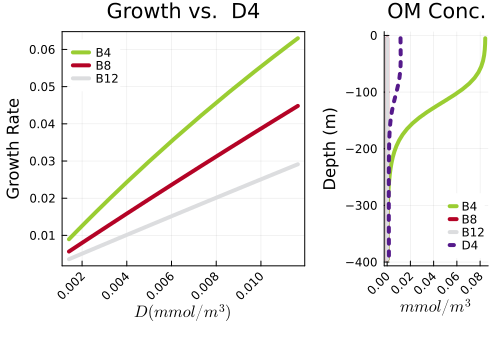

In [39]:
plot_growth_over_D([growthB[4], growthB[8], growthB[12]], [Bw[:,4], Bw[:,8], Bw[:,12]], Dw[:,4], [" B4", " B8", " B12"], " D4")

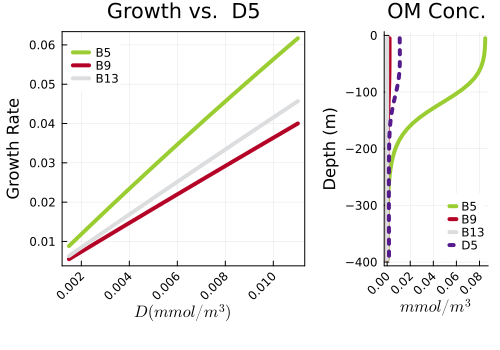

In [40]:
plot_growth_over_D([growthB[5], growthB[9], growthB[13]], [Bw[:,5], Bw[:,9], Bw[:,13]], Dw[:,5], [" B5", " B9", " B13"], " D5")

In [143]:
function calc_growthP(P, N, ds, season)

    II, JJ = get_nonzero_axes(ds["CMp"][:])
    umax = ds["umax_ij"][:]
    Kp = ds["Kp_ij"][:]

    growth = Any[]

    for j = axes(II, 1)
        uptake =  umax[II[j],JJ[j]] .* N ./ (N .+ Kp[II[j],JJ[j]])
        push!(growth, uptake)
    end

    return growth

end

calc_growthP (generic function with 1 method)

In [144]:
growthP = calc_growthP(Pw, Nw, winter, "Win")

4-element Vector{Any}:
 [0.24424568315744719; 0.24424640705719738; … ; 0.2445786485741335; 0.24457864895270942;;]
 [0.3589846062631827; 0.3589901466149615; … ; 0.36154761839230765; 0.36154762132321816;;]
 [0.22634100889511496; 0.2263415696213891; … ; 0.2265988633591336; 0.2265988636522441;;]
 [0.32114305550315325; 0.32114542580362077; … ; 0.32223551516552645; 0.32223551641016285;;]

In [ ]:
function plot_growth_over_N(growth1, growth2, biomass1, biomass2, R, lb, R_str)

    depth = 200
    dz = Int(depth/10)
    zc = get_zc(depth)
    l = @layout [a{0.9h} b{0.3w}]

    p1 = plot(R[1:dz], growth1[1:dz], lw=4, lc="olivedrab3", label=lb[1], ylabel="Growth Rate", xrotation=45, 
        xlabel=L" D (mmol/m^3)", border=:box, title="Growth vs. $R_str")
        plot!(R[1:dz], growth2[1:dz], lw=4, lc="red3", label=lb[2])

    p2 = plot(R[1:dz], -zc, lw=4, lc="darkgreen", ls=:dot, label="$R_str", xrotation=45, xlabel=L"mmol/m^3", ylabel="Depth (m)")
    plot!(biomass1[1:dz], -zc, lw=4, lc="olivedrab3", label=lb[1], title="OM Conc.")
    plot!(biomass2[1:dz], -zc, lw=4, lc="red3", label=lb[2])

    f = plot(p1, p2,
    fg_legend = :transparent,
    size=(600,450),
    layout = l,
    )

    return f

end